In [1]:
import sys
sys.path.append("../src")
sys.path.append("../utils")
import numpy as np
import cupy as cp
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.size'] = 15

In [2]:
for i in range(cp.cuda.runtime.getDeviceCount()):
    cp.cuda.runtime.setDevice(i)
    print([f"{round(x/1E9,2)}GB" for x in cp.cuda.runtime.memGetInfo()])

['32.0GB', '34.07GB']
['33.42GB', '34.07GB']


In [3]:
from sdader_simulator import SDADER_Simulator
import visualization as vsd
import initial_conditions as ic

# SD

t=1.0, steps taken 932, time taken 11.0179909451399


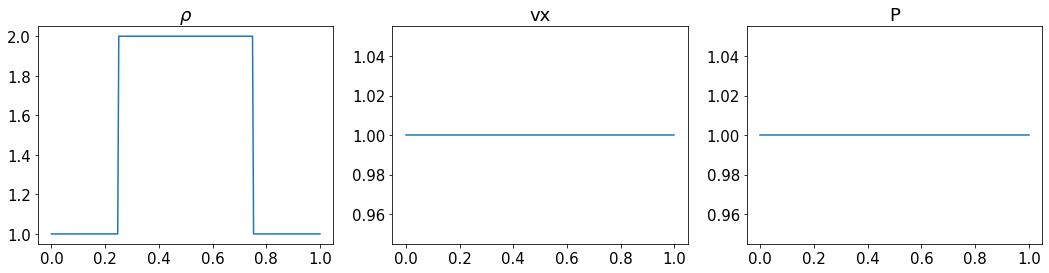

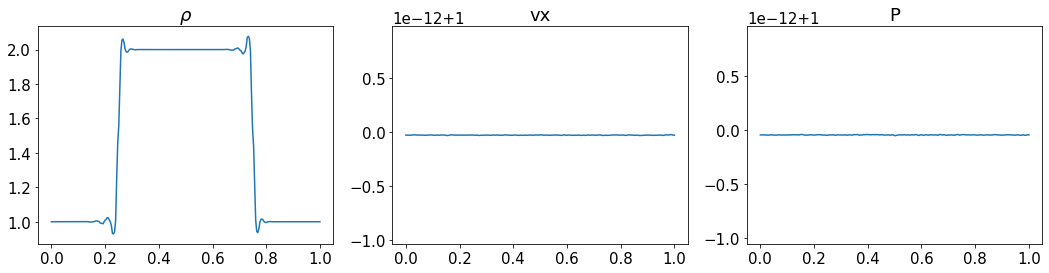

In [4]:
N=64
s = SDADER_Simulator(p=3,N=(N,),init_fct=ic.step_function(),cfl_coeff=0.6,update="SD",use_cupy=True)
vsd.plot_fields(s,s.dm.W_cv)
s.perform_time_evolution(1)
vsd.plot_fields(s,s.dm.W_cv)

t=1.0, steps taken 932, time taken 27.564014934934676


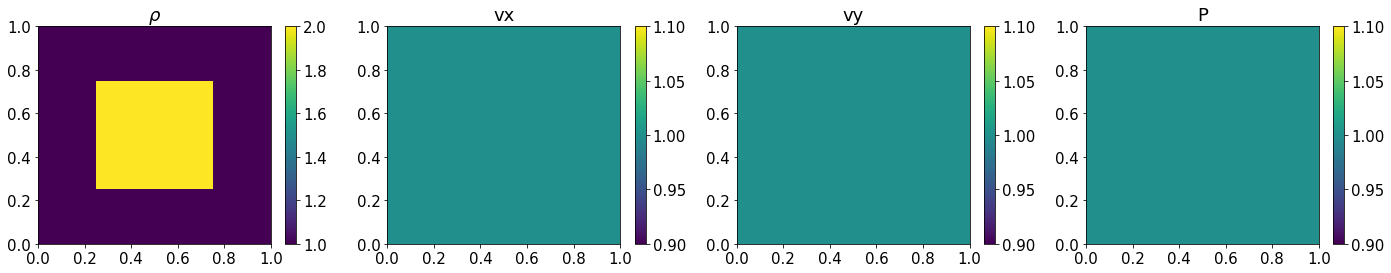

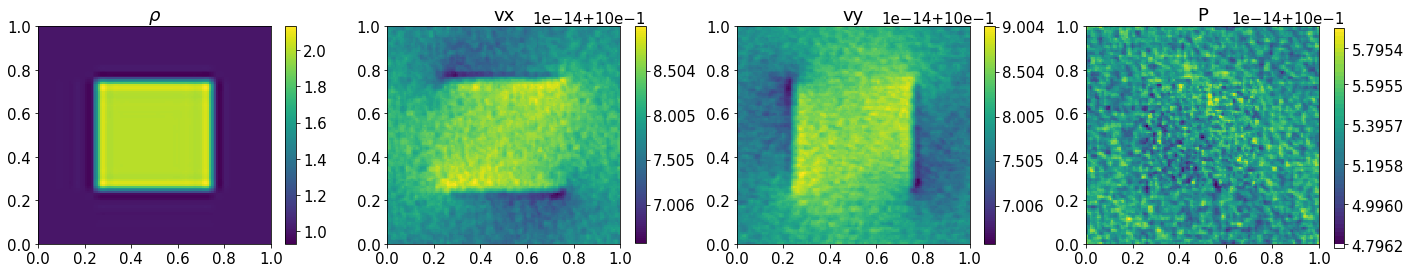

In [5]:
N=32
s = SDADER_Simulator(p=3,N=(N,N),init_fct=ic.step_function(),cfl_coeff=0.6,update="SD",use_cupy=True)
vsd.plot_fields(s,s.dm.W_cv)
s.perform_time_evolution(1)
vsd.plot_fields(s,s.dm.W_cv)

t=1.0, steps taken 699, time taken 60.11999922199175


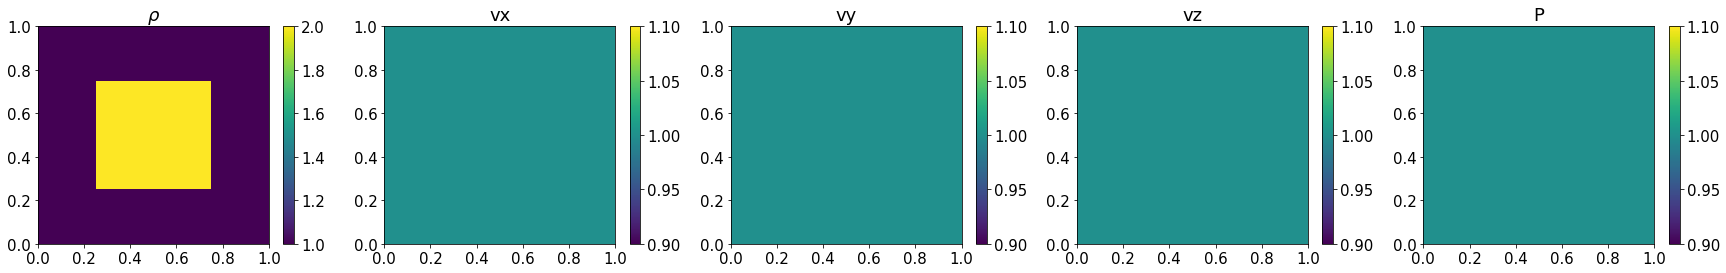

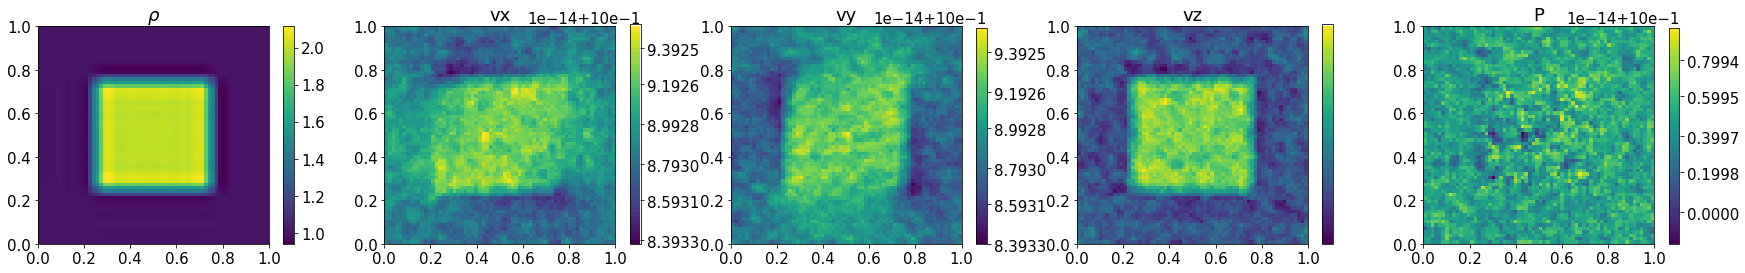

In [6]:
N=16
s = SDADER_Simulator(p=3,N=(N,N,N),init_fct=ic.step_function(),cfl_coeff=0.6,update="SD",use_cupy=True)
vsd.plot_fields(s,s.dm.W_cv)
s.perform_time_evolution(1)
vsd.plot_fields(s,s.dm.W_cv)

# SD+FB

t=1.0, steps taken 932, time taken 29.023238975089043


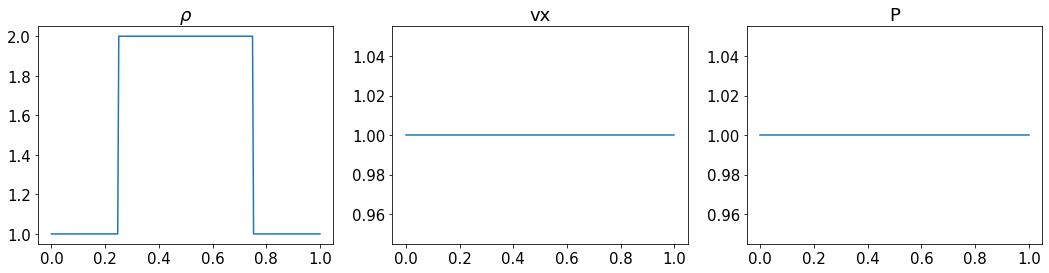

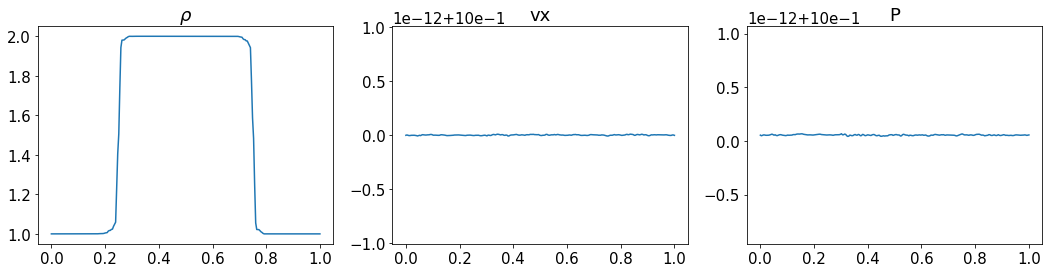

In [7]:
N=64
s = SDADER_Simulator(p=3,N=(N,),init_fct=ic.step_function(),cfl_coeff=0.6,update="FV",FB=True,
                     blending=False,use_cupy=True)
vsd.plot_fields(s,s.dm.W_cv)
s.perform_time_evolution(1)
vsd.plot_fields(s,s.dm.W_cv)

t=1.0, steps taken 932, time taken 58.875777039909735


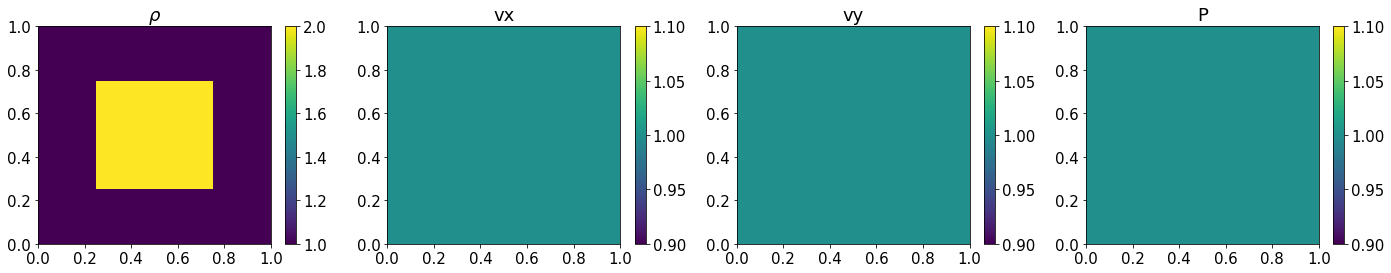

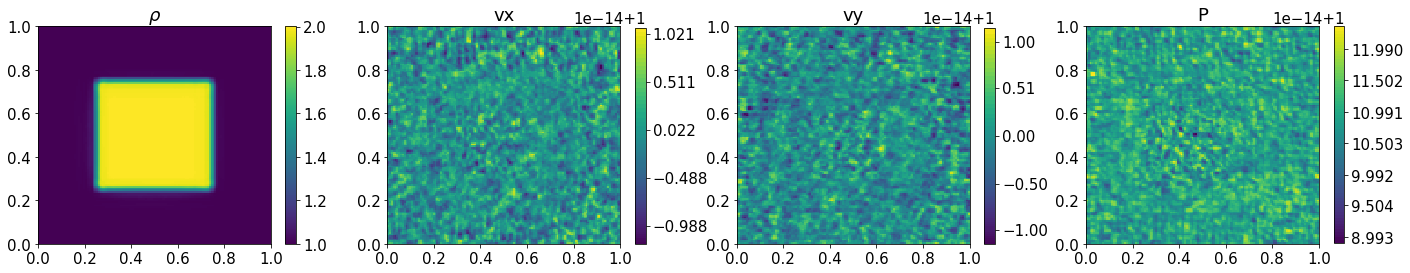

In [8]:
N=32
s = SDADER_Simulator(p=3,N=(N,N),init_fct=ic.step_function(),cfl_coeff=0.6,update="FV",FB=True,
                     blending=False,use_cupy=True)
vsd.plot_fields(s,s.dm.W_cv)
s.perform_time_evolution(1)
vsd.plot_fields(s,s.dm.W_cv)

t=1.0, steps taken 699, time taken 112.82266048784368


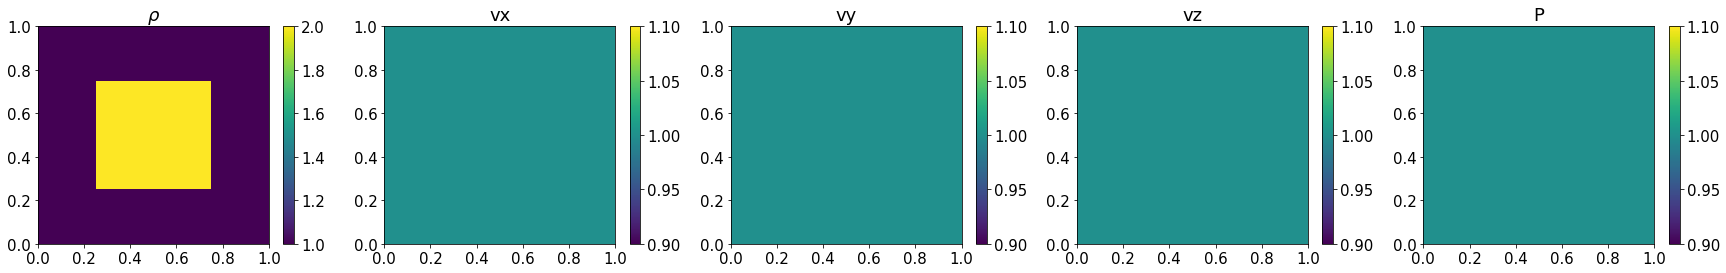

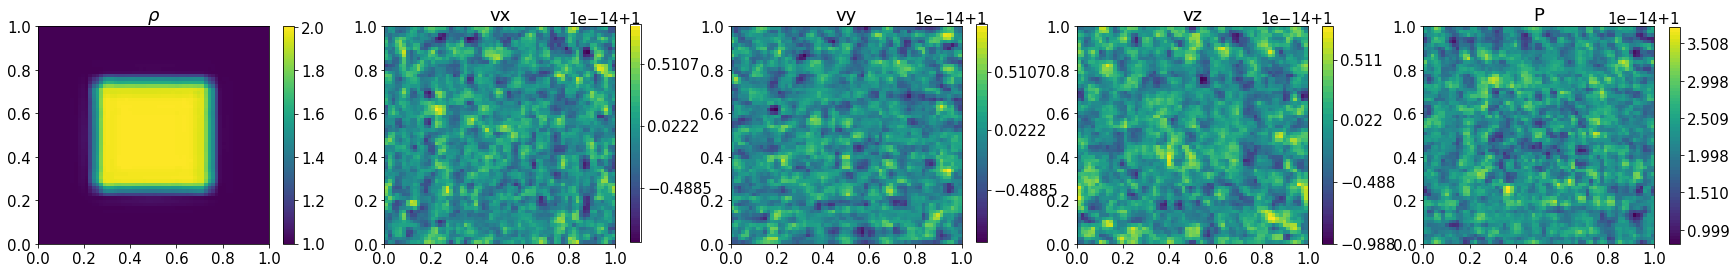

In [9]:
N=16
s = SDADER_Simulator(p=3,N=(N,N,N),init_fct=ic.step_function(),cfl_coeff=0.6,update="FV",FB=True,
                     blending=False,use_cupy=True)
vsd.plot_fields(s,s.dm.W_cv)
s.perform_time_evolution(1)
vsd.plot_fields(s,s.dm.W_cv)

# SD+FB+Blending

t=1.0, steps taken 932, time taken 28.942360886139795


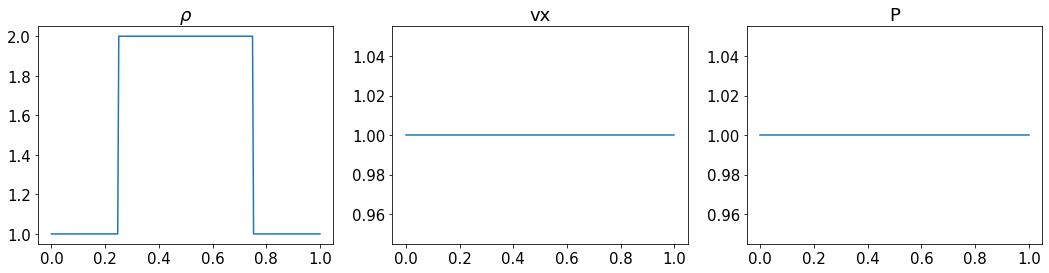

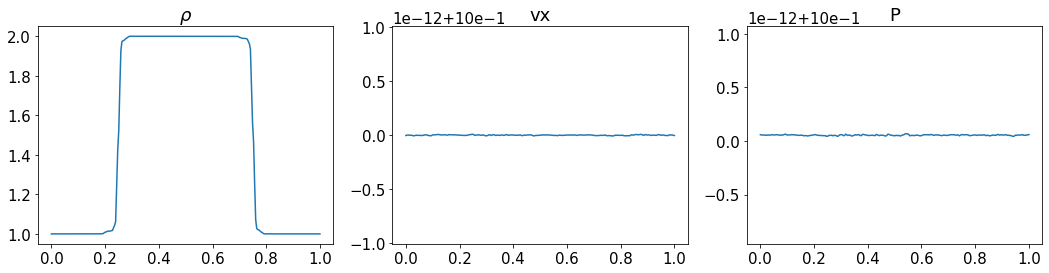

In [10]:
N=64
s = SDADER_Simulator(p=3,N=(N,),init_fct=ic.step_function(),cfl_coeff=0.6,update="FV",FB=True,
                     blending=True,use_cupy=True)
vsd.plot_fields(s,s.dm.W_cv)
s.perform_time_evolution(1)
vsd.plot_fields(s,s.dm.W_cv)

t=1.0, steps taken 932, time taken 60.974832877051085


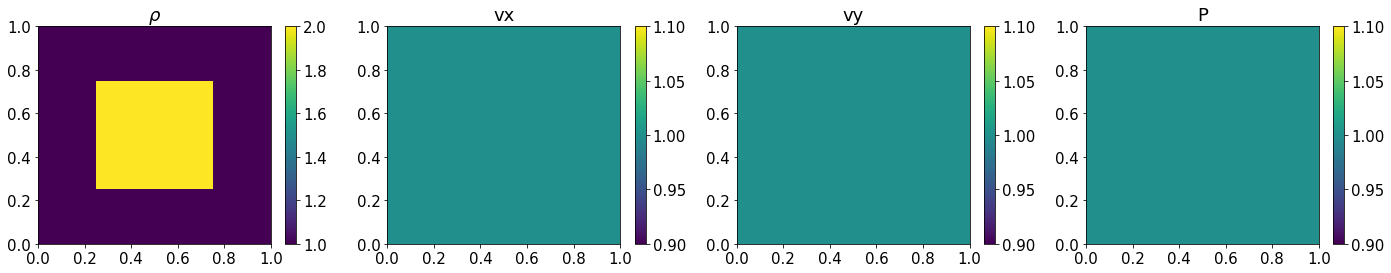

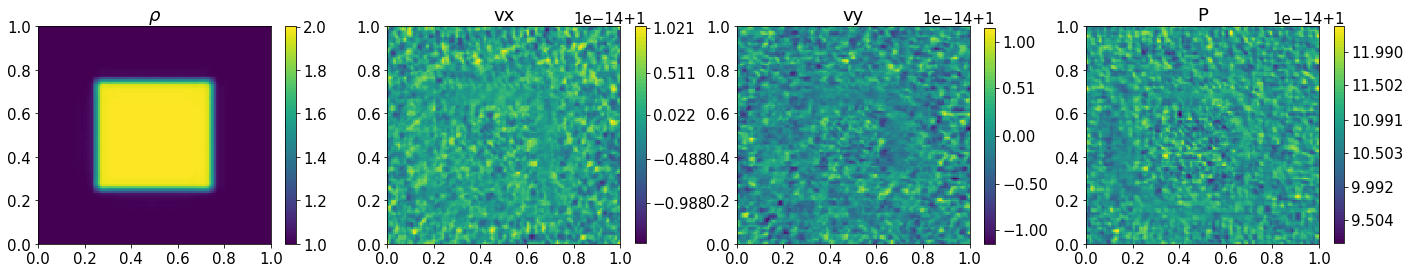

In [11]:
N=32
s = SDADER_Simulator(p=3,N=(N,N),init_fct=ic.step_function(),cfl_coeff=0.6,update="FV",FB=True,
                     blending=True,use_cupy=True)
vsd.plot_fields(s,s.dm.W_cv)
s.perform_time_evolution(1)
vsd.plot_fields(s,s.dm.W_cv)

t=1.0, steps taken 699, time taken 119.76511726016179


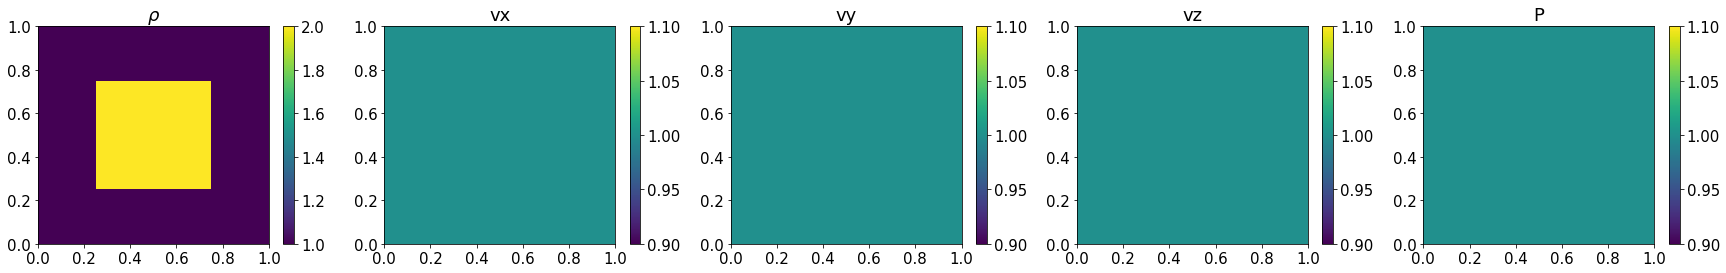

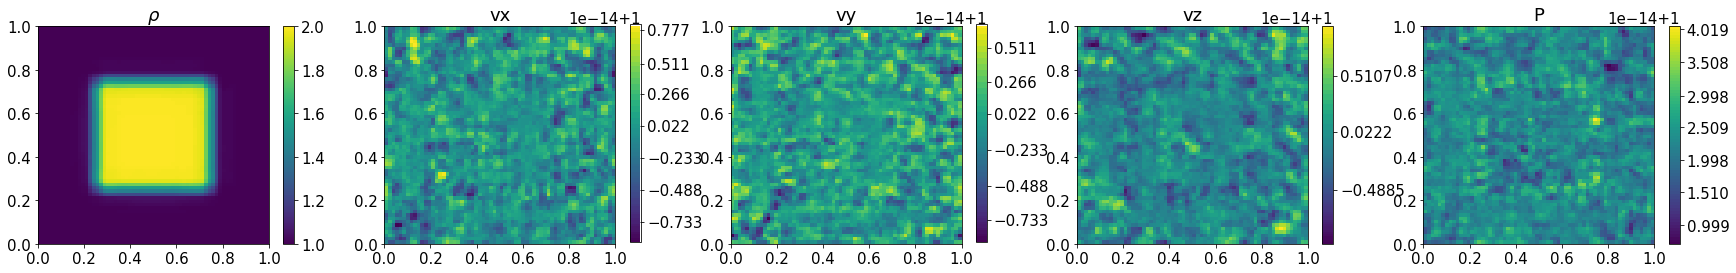

In [12]:
N=16
s = SDADER_Simulator(p=3,N=(N,N,N),init_fct=ic.step_function(),cfl_coeff=0.6,update="FV",FB=True,
                     blending=True,use_cupy=True)
vsd.plot_fields(s,s.dm.W_cv)
s.perform_time_evolution(1)
vsd.plot_fields(s,s.dm.W_cv)

# HLLC (FB)

t=1.0, steps taken 932, time taken 32.67963603604585


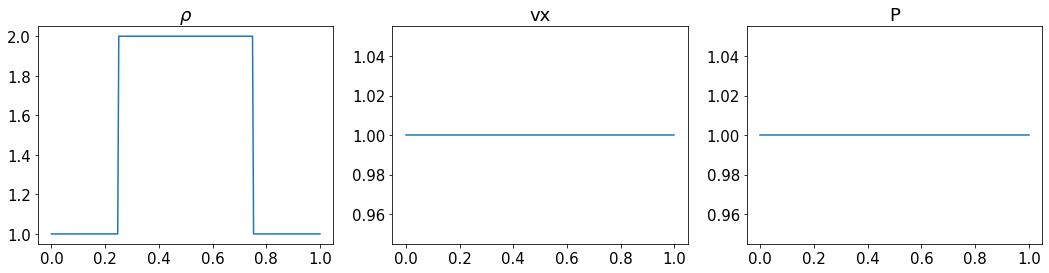

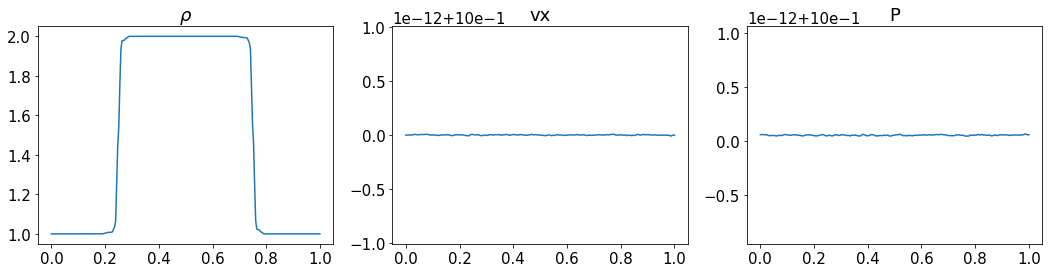

In [4]:
N=64
s = SDADER_Simulator(p=3,N=(N,),init_fct=ic.step_function(),cfl_coeff=0.6,update="FV",FB=True,
                     blending=True,use_cupy=True,
                     riemann_solver_fv="hllc")
vsd.plot_fields(s,s.dm.W_cv)
s.perform_time_evolution(1)
vsd.plot_fields(s,s.dm.W_cv)

# MONCEN (FB)

t=1.0, steps taken 932, time taken 34.121478862827644


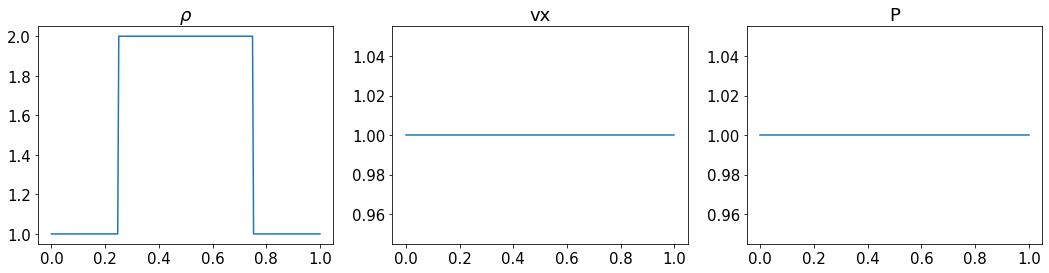

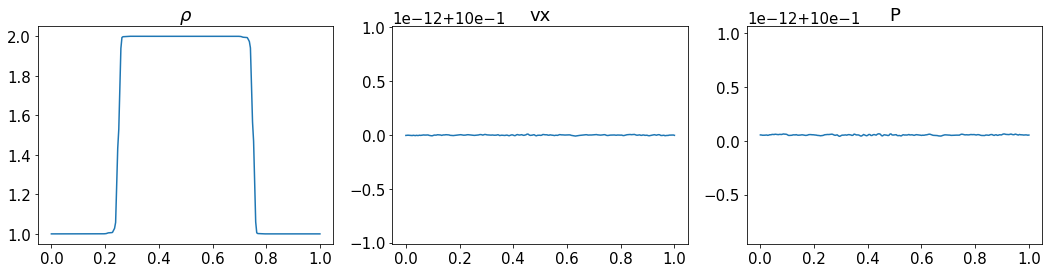

In [5]:
N=64
s = SDADER_Simulator(p=3,N=(N,),init_fct=ic.step_function(),cfl_coeff=0.6,update="FV",FB=True,
                     blending=True,use_cupy=True,
                     riemann_solver_fv="hllc",slope_limiter="moncen")
vsd.plot_fields(s,s.dm.W_cv)
s.perform_time_evolution(1)
vsd.plot_fields(s,s.dm.W_cv)